# Questions pour mes partners
* C'est quoi l'angle d'attque qu'on veut: on focus sur Bag Of Visual Words ou sur PlantVillage?
* Qu'est-ce qu'on remet
    * Je pensais travailler avec les notebooks et s'en servir pour faire un pdf final (donc on met au propre chaque notebook un moment donne)
    * On peut remettre un .zip qui a le rapport + le code

In [1]:
%matplotlib inline

#
# import utilitaires
#
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

import helpers as hlp
import helpers.dataset.PlantVillage as pv
import helpers.features as feat


#
# parametres dataset PlantVillage
#
config_overrides = hlp.MetaObject.from_json("config_overrides.json")
executor = hlp.create_thread_pool_executor()

pv_config = pv.Config(executor)
if not config_overrides is None:
    hlp.MetaObject.override_from_object(pv_config, 
                                        config_overrides.dataset)

print("pv_config")
display(vars(pv_config))


#
# obtenir le dataset PlantVillage
#
pv_dataset = pv.load(pv_config)
pv_dataframe = pv_dataset.dataframe

print("PlantVillage", pv_dataframe.shape)

pv_config


{'url': 'https://tinyurl.com/22tas3na',
 'install_path': 'dataset/PlantVillage.hd5',
 'species_disease_re': '(.*)(?:___)(.*)',
 'species_re': '(.*)(?:,_|_)(.*)',
 'label_separator': '_',
 'thumbnail_scale': 0.25,
 'force_download': False,
 'read_only': True,
 'executor': <concurrent.futures.thread.ThreadPoolExecutor at 0x1b2bf3d8d90>,
 'force_install': False}

PlantVillage (60343, 5)


In [3]:
#
# get some images
#
if True:
    pv_image_indices = [random.randint(0, pv_dataframe.shape[0]) for _ in range(12)]
else:
    pv_image_indices = [46764, 21155, 18039, 7483, 6065, 39987, 841, 52365, 46308, 55725, 58270, 60308]
    # pv_image_indices = [30216, 11674, 32328, 8547, 38437, 34810, 48341, 9291, 7951, 35612, 525, 31282]

pv_image_labels = pv_dataframe.loc[pv_image_indices, "label"].values
pv_images = [pv_dataset.get_image(i) for i in pv_image_indices]

print(pv_image_indices)
print(pv_image_labels)


if False:
    _, axes = plt.subplots(3, 4, figsize=(11, 3 * 3.5))

    for ax, image, label in zip(axes.flatten(), pv_images, pv_image_labels):
        label = label.replace("_", "\n")
        
        plt.sca(ax)
        plt.title(label)
        plt.imshow(image)

    plt.tight_layout()
    plt.show()

[27979, 1562, 902, 44017, 34664, 9576, 18245, 18504, 4225, 10554, 60077, 32604]
['Pepper,_bell_healthy' 'Apple_Black_rot' 'Apple_scab'
 'Tomato_Early_blight' 'Soybean_healthy' 'Corn_Common_rust'
 'Orange_Haunglongbing_(Citrus_greening)'
 'Orange_Haunglongbing_(Citrus_greening)' 'Apple_healthy' 'Corn_healthy'
 'Tomato_Yellow_Leaf_Curl_Virus' 'Soybean_healthy']


In [4]:
def kmeans(image, k, max_iter=10, epsilon=1.0, attempts=10):
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, max_iter, epsilon)

    if len(image.shape) == 2:
        table = np.float32( image.flatten() )
    else:
        table = np.float32( image.reshape( (-1, image.shape[-1]) ) )

    compactness, labels, centers = cv2.kmeans(table, k, None, criteria, attempts, cv2.KMEANS_RANDOM_CENTERS)

    return centers.min(), \
           centers[ labels.flatten() ].astype(image.dtype).reshape((image.shape))

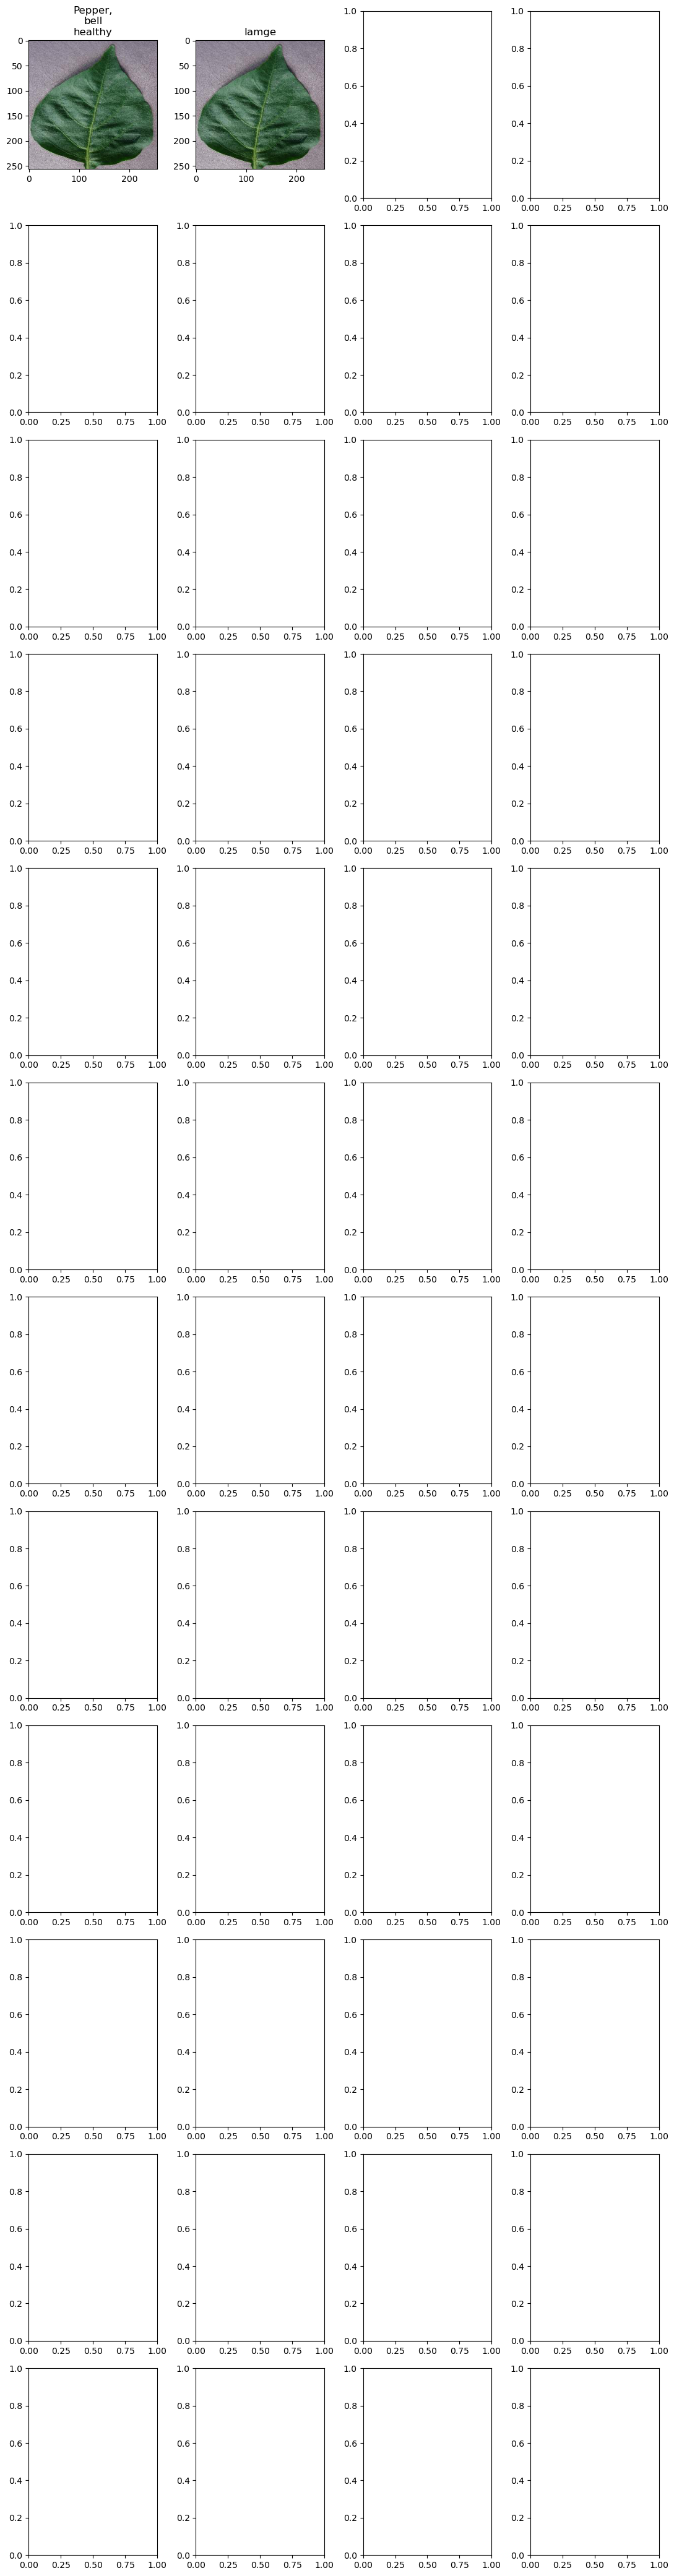

In [8]:
_, axes = plt.subplots(12, 4, figsize=(11, 12 * 3.5))

for i, (image, label) in enumerate( zip(pv_images, pv_image_labels) ):
    label = label.replace("_", "\n")

    plt.sca(axes[i, 0])
    plt.title(label)
    plt.imshow(image)
    
    #LAB
    if True:
        image = image.astype(np.float32) / 255.0

        lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

        l = lab[:, :, 0]
        ab = lab[:, :, 1:]
        
        # contrast adjustmant
        l_q05 = np.quantile(l, 0.05)
        l_q95 = np.quantile(l, 0.95)
        l_c = (l - l_q05) / (l_q95 - l_q05) * 100
        l_c = np.where(l_c < 0, 0, l)
        
        
        # faut prendre median cut avec sur couleur...
        # https://github.com/muthuspark/median-cut-color-quantization/blob/master/mcquantizer.py
        # split_into_buckets()
        def color_median(channels):
            print( channels.shape )
            print( channels.min() )
            
            
            pass
        
        def edge_median(channels, size=4):
            t = channels[:size, :, :]
            b = channels[-size:, :, :]
            
            l = channels[:, :size, :]
            r = channels[:, -size:, :]
            
            color_median(t)
            
            
#             b = np.median(  )
            
#             l = np.median(  )
#             r = np.median( img[:, -size:, ...] )
            
#             return t, b, l, r
            
        
        # edge color
#         e0, e1, e2, e3 = edge_median(ab)
        
        
        
#         print(l.min(), l.max())
#         print(l_q05, l_q95)
#         print()
        
#         plt.sca(axes[i, 1])
#         plt.title("L")
#         plt.imshow(l, cmap="gray")

#         plt.sca(axes[i, 2])
#         plt.title("L contrat.")
#         plt.imshow(l_c, cmap="gray")
        
# #         lab_2 = np.stack([l_c, a, b], axis=2)
#         rgb = cv2.cvtColor(lab_2, cv2.COLOR_LAB2BGR)

#         plt.sca(axes[i, 3])
#         plt.title("RGB")
#         plt.imshow(rgb)


        plt.sca(axes[i, 1])
        plt.title("Iamge")
        plt.imshow(image)
        
        break

plt.tight_layout()
plt.show()

In [ ]:
# # HSV threshold mais en tenand compte que H wrap a 0
# if False:
#     image = image.astype(np.float32) / 255.0

#     hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

#     h = hsv[:, :, 0]
#     h = np.where(h > 180.0, h - 360.0, h)

#     s = hsv[:, :, 2]

#     h_thresholded = cv2.inRange(h, (40.0), (160.0))
#     s_thresholded = cv2.inRange(s, (0.2), (1.0))

#     hs = np.stack([h, s], axis=2)
#     hs_thresholded = cv2.inRange(hs, (40.0, 0.2), (160.0, 1.0))

#     plt.sca(axes[i, 1])
#     plt.imshow(h, cmap="gray")

#     plt.sca(axes[i, 2])
#     plt.imshow(s, cmap="gray")

#     plt.sca(axes[i, 3])
#     plt.imshow(hs_thresholded, cmap="gray")

In [ ]:
#     if False:
#         hsv_s = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)[:, :, 1]

#         hsv_s = bilateral = cv2.bilateralFilter(hsv_s, 15, 75, 27)
#         min_s, hsv_s = kmeans(hsv_s, 3)

#         # threshold
#         if False:
#             hsv_s = np.where(hsv_s > min_s, 255, 0)

#         plt.sca(axes[i, 1])
#         plt.title("Mask")
#         plt.imshow(hsv_s, cmap="gray")

#         hsv_s = hsv_s[..., np.newaxis]
#         rgb_img = np.uint8(image * hsv_s / 255.0)
#         plt.sca(axes[i, 2])
#         plt.title("Masked")
#         plt.imshow(rgb_img)